### Fourier Transform removing frequencies

In [23]:
import sys 
sys.path.append("../data/")
sys.path.append("../artifacts/")
from load_EEGs_1c import EEGDataset1c
from synthetic_artifacts_1c import SyntheticArtifiacts1c 
import stacklineplot
import torch
import torch.utils.data as data
import scipy
from scipy.fftpack import fft, ifft
import numpy as np

In [32]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 3]

In [10]:
files_csv = "../data/dataset_csv/sample_file.csv"
dataset = EEGDataset1c(files_csv, max_num_examples=100, length=784)

In [16]:
x = dataset[0].numpy()

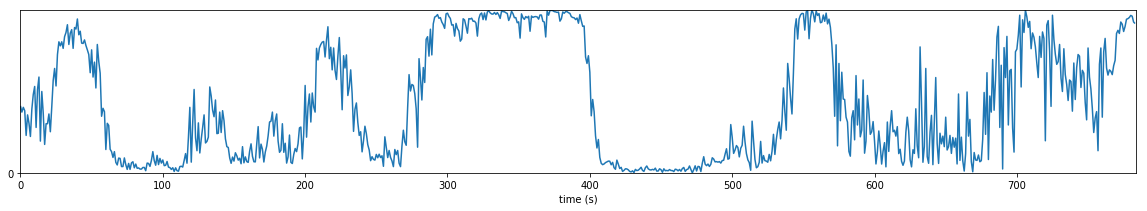

In [33]:
stacklineplot.stackplot(x)

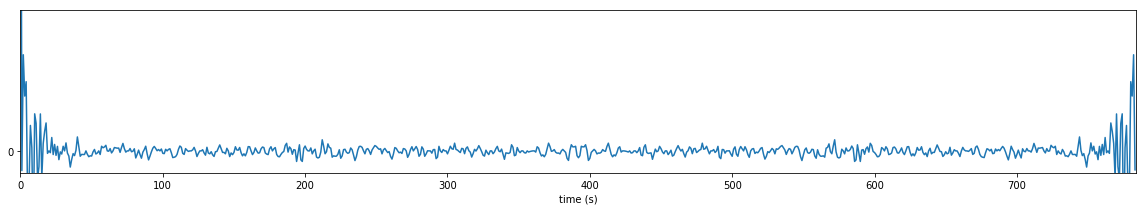

In [97]:
stacklineplot.stackplot(y, yscale=4)

In [182]:
y = fft(x)
# y[:, 100:] = 0 # remove high frequency
y[:, :100] = 0 # remove low frequency

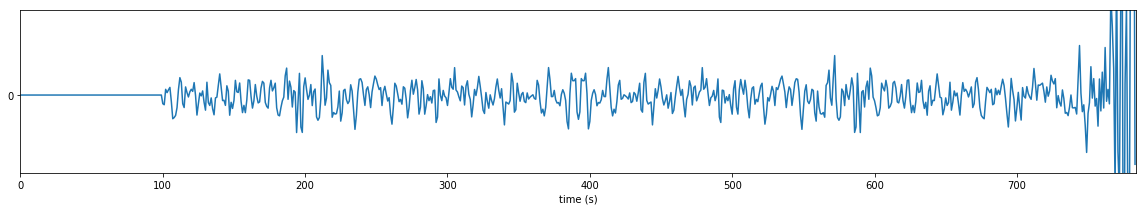

In [183]:
stacklineplot.stackplot(y, yscale=4)
# plt.plot(y[0])
# plt.show()

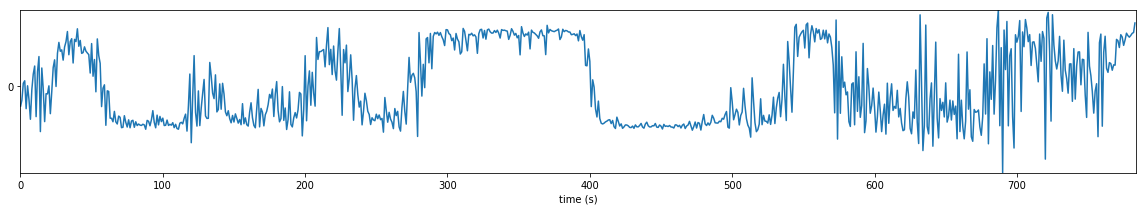

In [184]:
x_hat = ifft(y)
stacklineplot.stackplot(x_hat)